# Assignment 2 - Question 3: Tree-based Models 
**Course Name:** Machine Learning (DDA3020)

(30 points in total)

<font color=Red>*Please enter your personal information (Double-click this block first)*</font>

**Name:** CAI, Yuquan

**Student ID:** 122090007

### Overview

In this question, you will use three tree-based models (Decision Tree, Bagging, and Random Forest) to solve a real problem, image classification. The tasks includes training models by different parameters, comparing the results of different models, and trying to find the best parameter combination. As a part of an assignment, your task is to **run all codes in this script and complete the parts marked with** <font color=Red>\[TASK\]</font>.

### Dataset Introduction

Since we will use a same dataset for both question 3 & 4, it's important to have an overall knowledge of this dataset. The dataset is called **Fashion-MNIST**, a member of the MNIST family, but I think it's more interesting. This dataset is an image classification task with ten categories, all of which are items from our daily lives. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image. It means that we can use 784 numbers (in the range of 0~255) to represent one image. More details can be found in https://github.com/zalandoresearch/fashion-mnist.

OK. Now it's time to start, please read and run each block of codes in order, so that you will have a smooth experience.

In [1]:
import numpy as np
import gzip
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

# Please do not modify the seed number here.
np.random.seed(336)

Don't need to carefully read this block since it's just loading the dataset. Just run it.

In [2]:
def load_mnist(path, kind, subset=None):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'%kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'%kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    if subset is not None:
        selected_images, selected_labels = [], []
        for label in range(10):
            indices = np.where(labels == label)[0]
            selected_indices = np.random.choice(indices, subset, replace=False)
            selected_images.append(images[selected_indices])
            selected_labels.append(labels[selected_indices])
        images = np.concatenate(selected_images, axis=0)
        labels = np.concatenate(selected_labels, axis=0)

        paired = list(zip(images, labels))
        random.shuffle(paired)
        images, labels = zip(*paired)
    
    return np.array(images), np.array(labels)

In this question, we only use a subset of Fashion-MNIST dataset to reduce compuration time.

In [3]:
X_train, y_train = load_mnist('./data/', kind='train', subset=100)
X_test, y_test = load_mnist('./data/', kind='t10k', subset=20)

You can repeat running this block for several times to see different images with its label in this dataset.

The label index of this image is: 3
The label name of this graph is: Dress


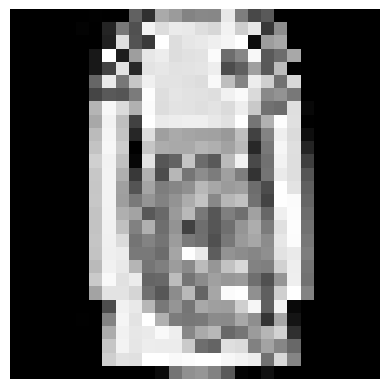

In [33]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
idx = random.choice(range(0,len(X_test)))
print(f"The label index of this image is: {y_test[idx]}")
print(f"The label name of this graph is: {label_names[y_test[idx]]}")

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In this question, we use each pixel to represent different features of a data sample. It means that each sample will have 784 features to learn and 1 label to predict. The advantage is that you don't need to struggle on data processing but focus on training models and analyzing results.

In [34]:
X_train = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])

In both question 3 & 4, we only use one metric, **accuracy_score**. Here is a simple example about how to use this function from sklearn.

In [36]:
from sklearn.metrics import accuracy_score
_y_true = [0,1,1,2,0]
_y_pred = [1,1,2,2,0]
accuracy_score(_y_true, _y_pred)

0.6

### Task 1
Write code to train Decision Tree Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_dt and test_acc_dt. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

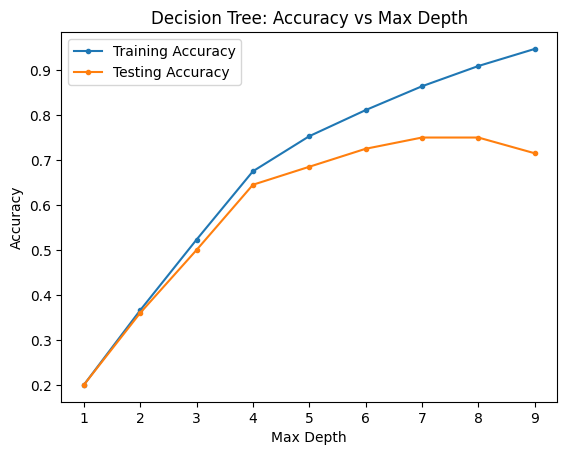

In [80]:
from sklearn.tree import DecisionTreeClassifier
train_acc_dt = []
test_acc_dt  = []
depth_list = range(1, 10)


##########################
## Write your code here ##
for depth in depth_list:
    dt = DecisionTreeClassifier(random_state=0,
                            max_depth=depth)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_acc_dt.append(accuracy_score(y_train, y_train_pred))
    test_acc_dt.append(accuracy_score(y_test, y_test_pred))
##########################


plt.plot(depth_list, train_acc_dt, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_dt, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer: The accuracy of both the training and test sets increases gradually as the depth increases. The accuracy of the training set increases with depth and approaches 100%. The accuracy of the test set increases rapidly at depths 1-4, and after depth 4 the accuracy increases slowly and stabilises at around 70% and starts to decrease after depth 7.

### Task 2
Write code to train Random Forest Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_rf and test_acc_rf. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

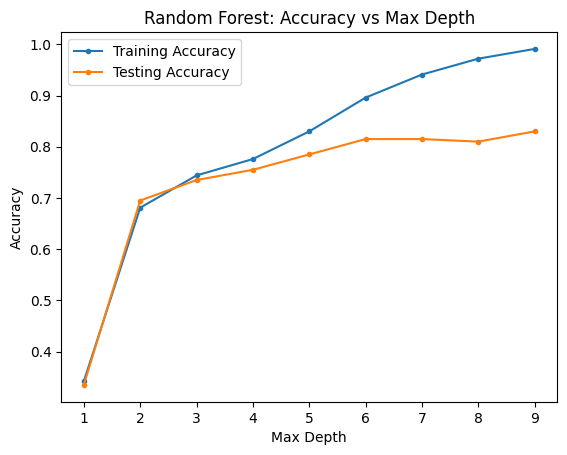

In [82]:
from sklearn.ensemble import RandomForestClassifier
train_acc_rf = []
test_acc_rf  = []
depth_list = range(1, 10)


##########################
## Write your code here ##
for depth in depth_list:
    rf = RandomForestClassifier(random_state=0,
                             max_depth=depth)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_acc_rf.append(accuracy_score(y_train, y_train_pred))
    test_acc_rf.append(accuracy_score(y_test, y_test_pred))
##########################


plt.plot(depth_list, train_acc_rf, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_rf, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Try to compare this graph with the above one (Decision Tree's graph), and write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer: The overall accuracy of the random forest is higher than that of the single decision tree, with the accuracy of the training set gradually stabilising at 80% as the depth gets larger, compared to only 70% for the single decision tree.

### Task 3
Write code to train **both Bagging and Random Forest** Classification models with different **n_estimators** (=10,20,50,100). Save the accuracy scores of predicting test data for both models respectively in bagging_test_acc and rf_test_acc. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

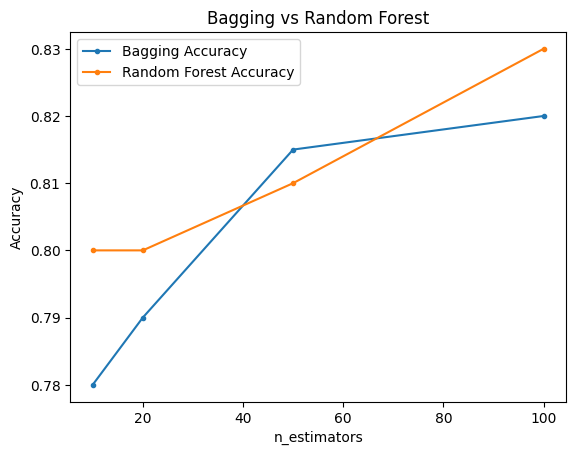

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
n_estimators_list = [10, 20, 50, 100]
bagging_test_acc = []
rf_test_acc = []


##########################
## Write your code here ##
for n in n_estimators_list:
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=n,
        random_state=0
    )
    bagging.fit(X_train, y_train)
    bagging_test_acc.append(accuracy_score(y_test, bagging.predict(X_test)))

    rf_clf = RandomForestClassifier(
        n_estimators=n,
        random_state=0
    )
    rf_clf.fit(X_train, y_train)
    rf_test_acc.append(accuracy_score(y_test, rf_clf.predict(X_test)))
##########################


plt.plot(n_estimators_list, bagging_test_acc, marker=".", label='Bagging Accuracy')
plt.plot(n_estimators_list, rf_test_acc, marker=".", label='Random Forest Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Bagging vs Random Forest')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both models. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer: Overall the accuracy of bagging and random forests are very similar, with both models increasing in accuracy as n_estimators increase. The average accuracy of random forests is greater than that of bagging, but bagging accuracy surpasses random forests at n_estimators = 50.

### Task 4
Write code to find the best parameter combination from **\[n_estimators=50/100/200, max_depth=5/10/20/50\]** by 4-fold cross validation. Please use GridSearchCV from sklearn to implement that. Output the best parameter combination and the test accuracy score with the best parameters. <font color=Red>\[TASK\]</font> (6 points)

In [91]:
from sklearn.model_selection import GridSearchCV


##########################
## Write your code here ##
parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50]
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rf, parameter, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
##########################


print("Best params:", best_params)
print("Test Accuracy with Best Model: ", test_acc)

Best params: {'max_depth': 20, 'n_estimators': 100}
Test Accuracy with Best Model:  0.83
